In [17]:
################################ARIMA#######################
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

<ipython-input-18-921c81c6d678>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Date
2013-01-03    4327
2013-01-04    4486
2013-01-05    4997
2013-01-07    7176
2013-01-08    5580
Name: Sale, dtype: int64


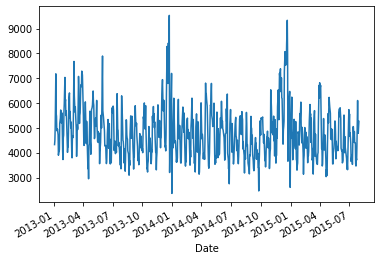

In [18]:
import os
import numpy as np
from pandas import read_csv, DataFrame
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

def parser(x):
	return datetime.strptime(x, '%d/%m/%Y')

file = "C:/Users/gurpr/Videos/BetaSci/Rossmann_Store1_Data_FULL.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(file))
df = read_csv(os.path.basename(file), header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(df.head())
df.plot()
pyplot.show()

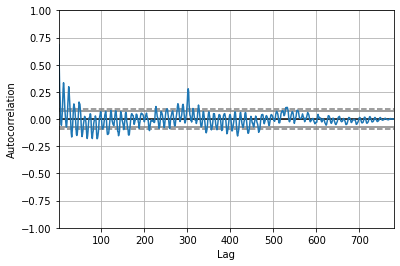

In [19]:
autocorrelation_plot(df)
pyplot.show()


C:\Users\gurpr\Videos\BetaSci\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\gurpr\Videos\BetaSci\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\gurpr\Videos\BetaSci\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                  780
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6267.207
Date:                Thu, 04 Mar 2021   AIC                          12546.413
Time:                        14:57:15   BIC                          12574.361
Sample:                             0   HQIC                         12557.163
                                - 780                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1451      0.027     -5.442      0.000      -0.197      -0.093
ar.L2         -0.0913      0.047     -1.948      0.051      -0.183       0.001
ar.L3         -0.2095      0.041     -5.086      0.0

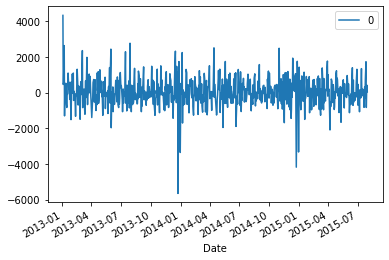

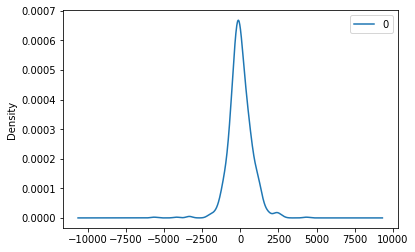

In [20]:
# fit model
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
from pandas import read_csv, DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [21]:
# split into train and test sets
X = df.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=6216.032899, expected=6185.000000
predicted=6300.069899, expected=4884.000000
predicted=5279.790227, expected=4345.000000
predicted=4389.300630, expected=4915.000000
predicted=5279.037228, expected=5060.000000
predicted=5080.763888, expected=5269.000000
predicted=5335.016831, expected=7263.000000
predicted=7023.697133, expected=8069.000000
predicted=7672.870590, expected=7739.000000
predicted=7310.817164, expected=7523.000000
predicted=7424.349369, expected=7785.000000
predicted=7463.074907, expected=7558.000000
predicted=7454.623290, expected=8367.000000
predicted=8263.205988, expected=9331.000000
predicted=9232.427090, expected=7959.000000
predicted=7887.741954, expected=3659.000000
predicted=4218.921485, expected=6057.000000
predicted=6196.927375, expected=6463.000000
predicted=6851.932335, expected=6466.000000
predicted=6076.925891, expected=2605.000000
predicted=4049.381010, expected=5509.000000
predicted=4973.273099, expected=5023.000000
predicted=5576.397632, expected=

In [36]:
#print(predictions)
out = np.array(predictions)
out.shape

(195,)

In [45]:
out = out.astype(int)
print(out)
np.savetxt("arima_pred.csv", out,delimiter='\n', fmt="%i")
#yhat.to_csv(r'C:\Users\gurpr\Videos\BetaSci\theta.csv', index=False, header=True)

[6216 6300 5280 4389 5279 5081 5335 7024 7673 7311 7424 7463 7455 8263
 9232 7888 4219 6197 6852 6077 4049 4973 5576 5157 5811 4072 4426 3656
 5041 4988 5005 4463 4407 4126 5199 3954 3622 3814 3204 3913 4563 4731
 4492 4467 4837 5554 5124 6004 4946 4578 4803 4801 4918 3994 3512 3740
 4023 4508 5039 4104 4771 4273 4258 4902 4288 3850 4065 4018 3903 4806
 4997 5670 5348 5363 4646 5168 4997 3610 4319 4079 3343 3809 5153 5209
 4793 3979 4659 4156 3903 4025 3411 3729 3876 4018 4914 6371 5801 6499
 6551 6269 4746 4265 4198 3391 4709 5065 4658 4017 4285 4467 4660 3836
 3290 3413 3204 3257 4339 5186 4943 5498 6064 5471 5677 4742 4938 4837
 4591 5210 3600 3706 4222 3969 4542 5122 5037 4612 3962 4386 4429 4115
 4382 3986 4630 5402 5570 5307 5704 5318 4264 4375 4271 3690 3886 3815
 4121 5373 4713 3934 4746 4104 4090 4194 3667 3547 3565 3464 3885 5100
 5352 5083 5381 4677 4649 4723 3642 4113 3967 3821 3703 4854 4942 4485
 4654 4580 4489 4379 3868 3442 3997 3656 4368 5849 4809 4600 5212]


In [ ]:
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.figure(figsize=(50,20))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.savefig('arima.png')
pyplot.show()

